# Perceptrons
```
----------------------------------------------------------------------
Filename : 02_perceptrons.ipynb
Date     : 15th March, 2017
Author   : Jaidev Deshpande
Purpose  : Introducing perceptrons and hinge loss.
Libraries: Tensorflow and its dependencies
----------------------------------------------------------------------
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from utils import draw_decision_boundary
plt.style.use('ggplot')
plt.rc('figure', figsize=(8, 6))
%matplotlib inline

## Let's make some dummy data

/Users/jaidevd/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/Users/jaidevd/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


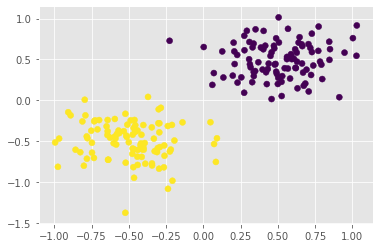

In [2]:
rng = np.random.RandomState(12345)
xx = rng.multivariate_normal([0.5, 0.5], [[0, 0.05], [0.05, 0]], size=(100,))
yy = rng.multivariate_normal([-0.5, -0.5], [[0, 0.05], [0.05, 0]], size=(100,))
X = np.r_[xx, yy]
Y = np.ones((200,))
Y[:100] = -1
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Perceptron Learning Rule:
![](perceptron.png)
* ### Inputs $X$, $y$, where $X$ is a matrix with each row representing a training sample
* ### Weights $W$ is a column vector of weights
* ### Bias $b$
* ### Hypothesis $f = XW + b$
* ### Prediction $t$: 1 if $f \geq 0$ else 0
* ### Learning:
    1. If the prediction is correct, do nothing.
    2. If the prediction is a false positive, subtract the training sample from the weights
    3. If the prediction is a false negative, add the training sample to the weights

In [3]:
class Perceptron2D(object):
    
    def __init__(self, weights=None, rng=None):
        if rng is None:
            rng = np.random.RandomState(123)
        if weights is None:
            weights = rng.rand(3,)
        self.weights = weights.reshape(-1, 1)
        
    def predict(self, x):
        if x.shape[1] == 2:
            x = np.c_[x, np.ones((x.shape[0],))]
        activation = np.dot(x, self.weights).ravel()
        activation[activation < 0] = -1
        activation[activation >= 0] = 1
        return activation
    
    def train(self, x, y, n_iter=50):
        x = np.c_[x, np.ones((x.shape[0],))]
        prediction = self.predict(x)
        _iter = 0
        while not np.all(prediction == y):
            false_negatives = np.logical_and(prediction == -1, y == 1)
            false_positives = np.logical_and(prediction == 1, y == -1)
            self.weights += np.sum(x[false_negatives, :], axis=0).reshape(-1, 1)
            self.weights -= np.sum(x[false_positives, :], axis=0).reshape(-1, 1)
            _iter += 1
            prediction = self.predict(x)
            if _iter > n_iter:
                break

Accuracy: 0.475


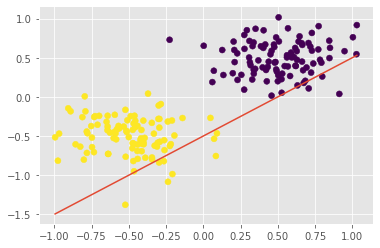

In [4]:
perc = Perceptron2D(weights=np.array([[-1], [1], [0.5]]))
prediction = perc.predict(X)
print("Accuracy: {}".format(accuracy_score(Y, prediction)))
draw_decision_boundary(perc.weights.ravel(), X, Y)

Accuracy: 1.0


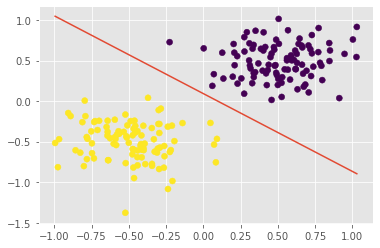

In [5]:
perc.train(X, Y)
prediction = perc.predict(X)
print("Accuracy: {}".format(accuracy_score(Y, prediction)))
draw_decision_boundary(perc.weights.ravel(), X, Y)

# Problem: Which loss function does the perceptron minimize?

## Introducing Hinge Loss
### Defining the _activation_ $f$ of the perceptron as above, and $L$ as the number of samples:
### Hinge Loss $H(W) = \sum_{i \in L}{max\{0, 1 - y_{i}f\}}$

# Enter theano

In [6]:
import tensorflow as tf

In [7]:
rng = np.random.RandomState(12345)
x = tf.constant(X, dtype='float32')
y = tf.constant(Y, dtype='float32')
w = tf.random.uniform((2, 1))
b = tf.random.uniform((1,))
f = tf.tensordot(x, w, 1) + b

## From defintion of Hinge loss:

In [ ]:
hinge_loss = T.sum(T.max(T.concatenate((T.zeros((x.shape[0], 1)), - f * y),
                                        axis=1), axis=1), axis=0) / x.shape[0]
predict = function([x], f)

In [ ]:
def get_prediction(activation):
    activation = activation.ravel()
    y = np.ones(activation.shape)
    y[activation < 0] = -1
    return y

In [ ]:
activation = predict(X)
print("Accuracy: {}".format(accuracy_score(Y, get_prediction(activation))))
draw_decision_boundary(w.get_value().ravel().tolist() + [b.get_value()], X, Y)

In [ ]:
gw, gb = T.grad(hinge_loss, [w, b])
get_loss = function([x, y], hinge_loss)
train = function([x, y], hinge_loss, updates=[(w, w - gw), (b, b - gb)])

In [ ]:
for i in range(11):
    if get_loss(X, Y.reshape(-1, 1)) > 0:
        print(train(X, Y.reshape(-1, 1)))
activation = predict(X)
print("Accuracy: {}".format(accuracy_score(Y, get_prediction(activation))))
draw_decision_boundary(w.get_value().ravel().tolist() + [b.get_value()], X, Y)